<img src = "https://logodownload.org/wp-content/uploads/2014/10/youtube-logo-9.png" width = 700>
<h1 align=center><font size = 5> Linear Regression for Data Trending Youtube Video // Final Project </font></h1>

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

This dataset includes several months (and counting) of data on daily trending YouTube videos.
Data is included for the KR (South Korea) with up to 200 listed trending videos per day.

Attributes :
1. video title
2. channel title
3. publish time
4. tags
5. views
6. likes and dislikes
7. description
8. comment count.

The data also includes a category_id field. To retrieve the categories for a specific video, find it in the associated JSON.

## Data Preparation

Load the library you need

Get the Trending Youtube Video Dataset from [here](https://www.kaggle.com/datasnaek/youtube-new) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime as dt
from datetime import time
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [2]:
# Load your dataset here
KR_video = pd.read_csv("data/KRvideos.csv")
print ('Data read into a pandas dataframe!')
KR_video_categories = pd.read_json('data/KR_category_id.json')

KR_video

Data read into a pandas dataframe!


,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,RxGQe4EeEpA,17.14.11,22,2017-11-13T07:07:36.000Z,156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False
1,hH7wVE8OlQ0,17.14.11,25,2017-11-13T10:59:16.000Z,76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False
2,9V8bnWUmE9U,17.14.11,22,2017-11-11T07:16:08.000Z,421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False
3,0_8py-t5R80,17.14.11,25,2017-11-12T11:19:52.000Z,222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False
4,bk55RbxiQdI,17.14.11,25,2017-11-13T11:08:59.000Z,84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,24,2018-06-10T23:00:01.000Z,156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False
34563,_Ne9ER-jr20,18.14.06,24,2018-06-12T07:00:06.000Z,130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False
34564,xuOQq_fzEjk,18.14.06,25,2018-06-12T13:17:29.000Z,62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False
34565,uXvjxeg08eQ,18.14.06,22,2018-06-11T11:57:20.000Z,63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
KR_video.head()

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,RxGQe4EeEpA,17.14.11,22,2017-11-13T07:07:36.000Z,156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False
1,hH7wVE8OlQ0,17.14.11,25,2017-11-13T10:59:16.000Z,76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False
2,9V8bnWUmE9U,17.14.11,22,2017-11-11T07:16:08.000Z,421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False
3,0_8py-t5R80,17.14.11,25,2017-11-12T11:19:52.000Z,222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False
4,bk55RbxiQdI,17.14.11,25,2017-11-13T11:08:59.000Z,84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
KR_video.tail()

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
34562,pj6YBBrO1sQ,18.14.06,24,2018-06-10T23:00:01.000Z,156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False
34563,_Ne9ER-jr20,18.14.06,24,2018-06-12T07:00:06.000Z,130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False
34564,xuOQq_fzEjk,18.14.06,25,2018-06-12T13:17:29.000Z,62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False
34565,uXvjxeg08eQ,18.14.06,22,2018-06-11T11:57:20.000Z,63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False
34566,C-bLqIftDY4,18.14.06,29,2018-06-10T20:00:01.000Z,63716,500,58,135,https://i.ytimg.com/vi/C-bLqIftDY4/default.jpg,False,False,False


To view the dimensions of the dataframe, we use the .shape parameter.

In [5]:
KR_video.shape

(34567, 12)

Let's view Dtype of each features in dataframe using .info() function.

In [6]:
KR_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   category_id             34567 non-null  int64 
 3   publish_time            34567 non-null  object
 4   views                   34567 non-null  int64 
 5   likes                   34567 non-null  int64 
 6   dislikes                34567 non-null  int64 
 7   comment_count           34567 non-null  int64 
 8   thumbnail_link          34567 non-null  object
 9   comments_disabled       34567 non-null  bool  
 10  ratings_disabled        34567 non-null  bool  
 11  video_error_or_removed  34567 non-null  bool  
dtypes: bool(3), int64(5), object(4)
memory usage: 2.5+ MB


## Exploratory & Preprocessing Data

Our dataset is ready for checking missing values.

In [7]:
print("Check if any column has null values :")
KR_video.isnull().sum()

Check if any column has null values :


video_id                  0
trending_date             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [8]:
print("Describe categorical data:")
KR_video.describe(exclude = "number")

Describe categorical data:


,video_id,trending_date,publish_time,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
count,34567,34567,34567,34567,34567,34567,34567
unique,15876,205,15862,16089,2,2,2
top,#NAME?,18.10.06,2018-03-07T09:00:01.000Z,https://i.ytimg.com/vi/AKDuAzSwaPI/default.jpg,False,False,False
freq,443,200,18,10,34056,33167,34526


In [9]:
print("Describe numerical data:")
KR_video.describe()

Describe numerical data:


,category_id,views,likes,dislikes,comment_count
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


Let's see category name in json data

In [10]:
with open('data/KR_category_id.json') as f:
    categories = json.load(f)['items']

In [11]:
category_name = {}
for category in categories:
    category_name[int(category['id'])] = category['snippet']['title']
KR_video['category_name'] = KR_video['category_id'].map(category_name)

In [12]:
print(category_name)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [13]:
KR_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   category_id             34567 non-null  int64 
 3   publish_time            34567 non-null  object
 4   views                   34567 non-null  int64 
 5   likes                   34567 non-null  int64 
 6   dislikes                34567 non-null  int64 
 7   comment_count           34567 non-null  int64 
 8   thumbnail_link          34567 non-null  object
 9   comments_disabled       34567 non-null  bool  
 10  ratings_disabled        34567 non-null  bool  
 11  video_error_or_removed  34567 non-null  bool  
 12  category_name           34279 non-null  object
dtypes: bool(3), int64(5), object(5)
memory usage: 2.7+ MB


In [14]:
KR_video.isnull().sum()

video_id                    0
trending_date               0
category_id                 0
publish_time                0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
category_name             288
dtype: int64

In [15]:
KR_video['category_name'].fillna(value='None',inplace=True)

In [16]:
# lets see how many videos are in each category
KR_video['category_name'].value_counts()

Entertainment           8955
News & Politics         7582
People & Blogs          7056
Film & Animation        2200
Comedy                  2056
Music                   1825
Gaming                  1392
Sports                   936
Pets & Animals           735
Howto & Style            558
Education                486
None                     288
Shows                    165
Autos & Vehicles         120
Science & Technology     115
Travel & Events           96
Trailers                   2
Name: category_name, dtype: int64

convert trending date to datetime

In [17]:
KR_video['publish_time'] = pd.to_datetime(KR_video['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

In [18]:
KR_video['publish_month'] = KR_video['publish_time'].dt.month

In [19]:
KR_video['trending_date'] = pd.to_datetime(KR_video['trending_date'],format = '%y.%d.%m')
KR_video['trending_month'] = KR_video['trending_date'].dt.month

In [20]:
KR_video.columns

Index(['video_id', 'trending_date', 'category_id', 'publish_time', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'category_name', 'publish_month', 'trending_month'],
      dtype='object')

In [21]:
KR_video['category_name'].value_counts()

Entertainment           8955
News & Politics         7582
People & Blogs          7056
Film & Animation        2200
Comedy                  2056
Music                   1825
Gaming                  1392
Sports                   936
Pets & Animals           735
Howto & Style            558
Education                486
None                     288
Shows                    165
Autos & Vehicles         120
Science & Technology     115
Travel & Events           96
Trailers                   2
Name: category_name, dtype: int64

In [22]:
KR_video.head()

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name,publish_month,trending_month
0,RxGQe4EeEpA,2017-11-14,22,2017-11-13 07:07:36,156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,People & Blogs,11,11
1,hH7wVE8OlQ0,2017-11-14,25,2017-11-13 10:59:16,76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,News & Politics,11,11
2,9V8bnWUmE9U,2017-11-14,22,2017-11-11 07:16:08,421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,People & Blogs,11,11
3,0_8py-t5R80,2017-11-14,25,2017-11-12 11:19:52,222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,News & Politics,11,11
4,bk55RbxiQdI,2017-11-14,25,2017-11-13 11:08:59,84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,News & Politics,11,11


In [23]:
like_percent = pd.DataFrame((KR_video['likes'] / KR_video['views']) * 100)
dislike_percent = pd.DataFrame((KR_video['dislikes'] / KR_video['views']) * 100)
KR_video['like_percent'] = like_percent
KR_video['dislike_percent'] = dislike_percent

In [24]:
KR_video['positive_or_negative'] = KR_video['like_percent'] > KR_video['dislike_percent']

In [25]:
# comparing the likes to dislikes 
video_feel = []
for item in KR_video['positive_or_negative']:
    if item == True:
        video_feel.append(1)
    else:
        video_feel.append(0)

In [26]:
KR_video['positive_or_negative'] = video_feel

In [27]:
KR_video.head()

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name,publish_month,trending_month,like_percent,dislike_percent,positive_or_negative
0,RxGQe4EeEpA,2017-11-14,22,2017-11-13 07:07:36,156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,People & Blogs,11,11,0.910779,0.025620,1
1,hH7wVE8OlQ0,2017-11-14,25,2017-11-13 10:59:16,76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,News & Politics,11,11,0.275698,0.036586,1
2,9V8bnWUmE9U,2017-11-14,22,2017-11-11 07:16:08,421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,People & Blogs,11,11,1.213073,0.039392,1
3,0_8py-t5R80,2017-11-14,25,2017-11-12 11:19:52,222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,News & Politics,11,11,0.939197,0.077631,1
4,bk55RbxiQdI,2017-11-14,25,2017-11-13 11:08:59,84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,News & Politics,11,11,1.295196,0.129046,1


## Visualization

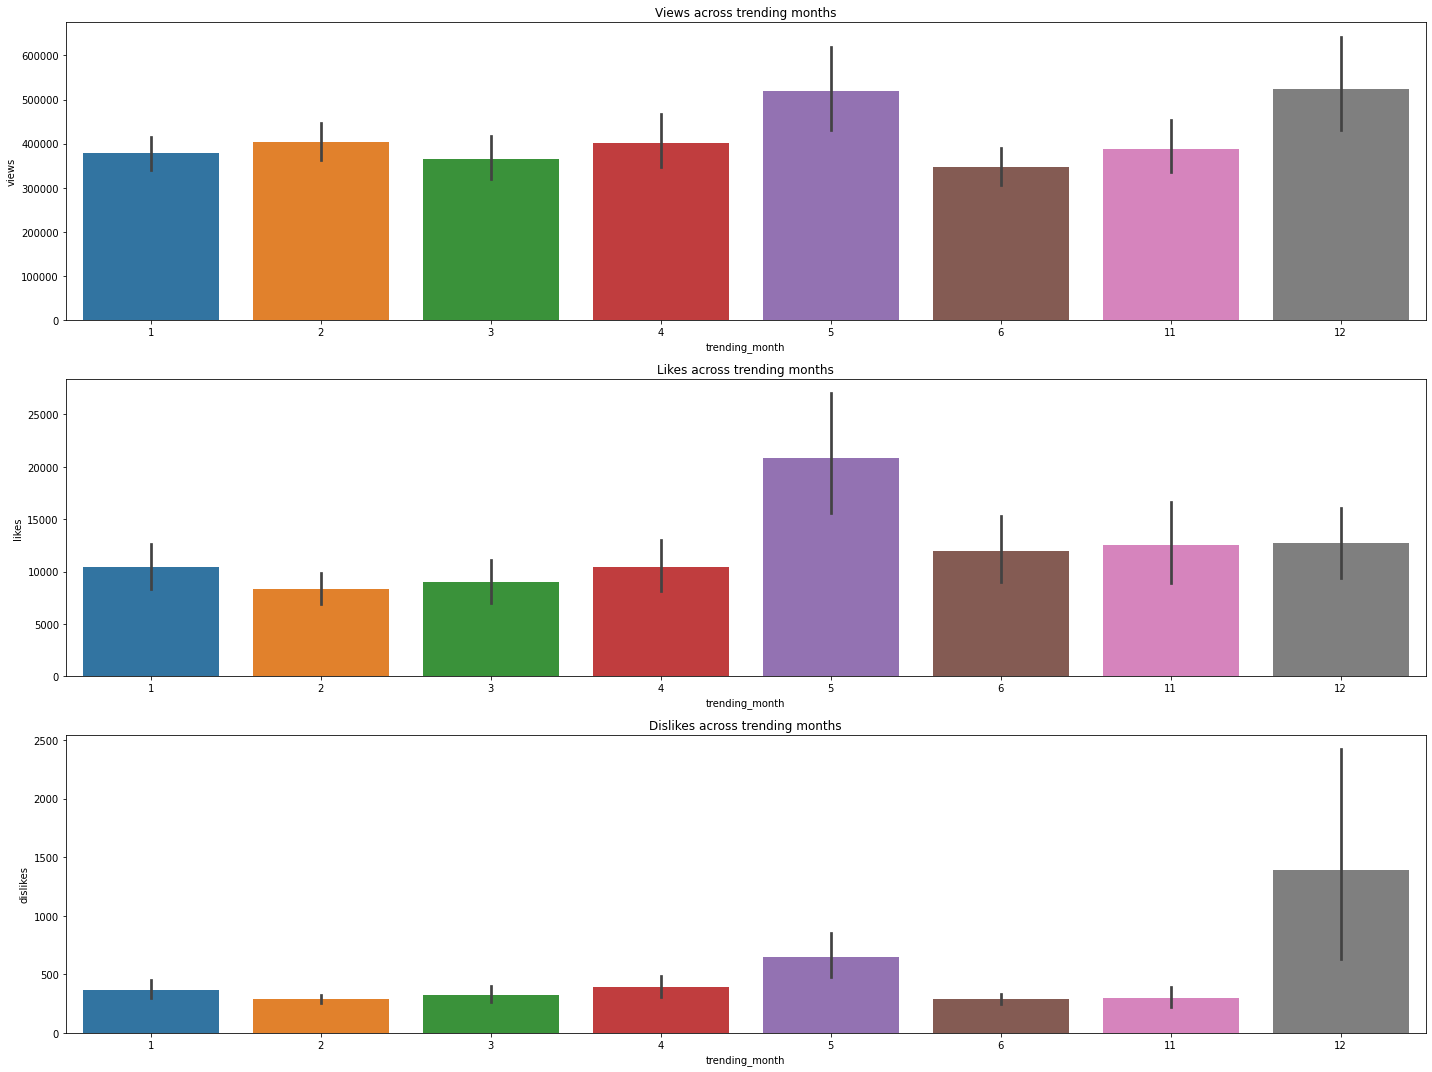

In [28]:
f, ax = plt.subplots(3,1,figsize=(20,15))
g = sns.barplot(x=KR_video['trending_month'],y=KR_video['views'],data=KR_video,ax=ax[0])
g.set_title('Views across trending months')
g1 = sns.barplot(x=KR_video['trending_month'],y=KR_video['likes'],data=KR_video,ax=ax[1])
g1.set_title('Likes across trending months')
g2 = sns.barplot(x=KR_video['trending_month'],y=KR_video['dislikes'],data=KR_video,ax=ax[2])
g2.set_title('Dislikes across trending months')
plt.tight_layout()

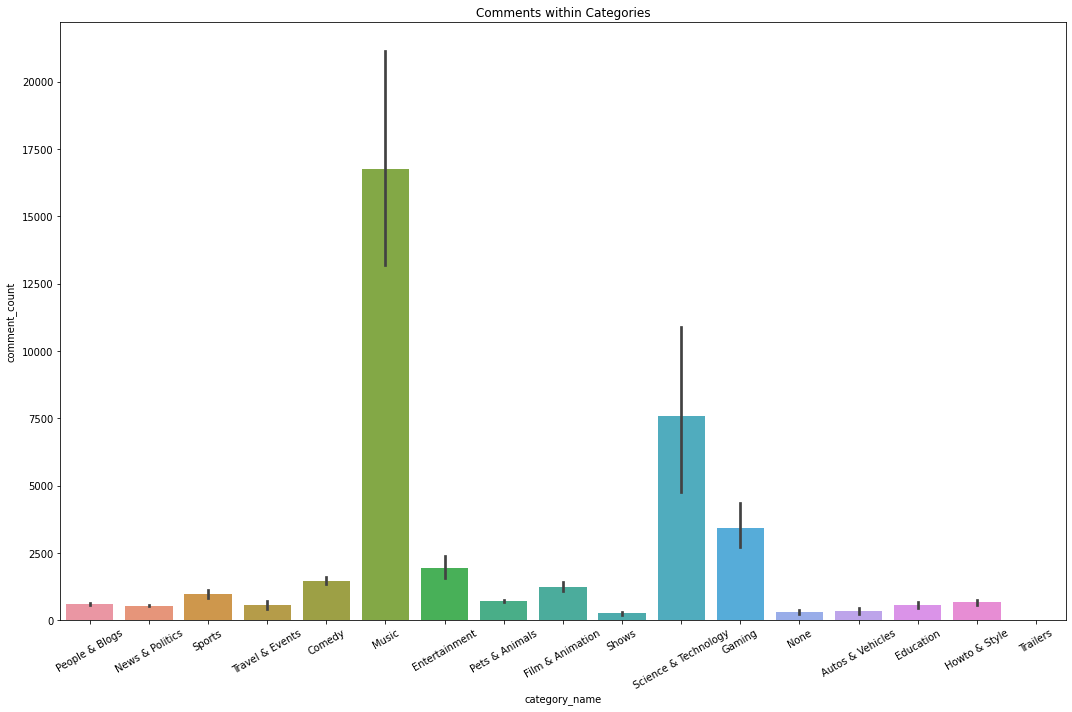

In [29]:
plt.figure(figsize=(15,10))
g = sns.barplot(x=KR_video['category_name'],y=KR_video['comment_count'],data=KR_video)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Comments within Categories')
plt.tight_layout()

Insight : it looks like Music seem to have the most 'comment' activities

(13.5, -0.5)

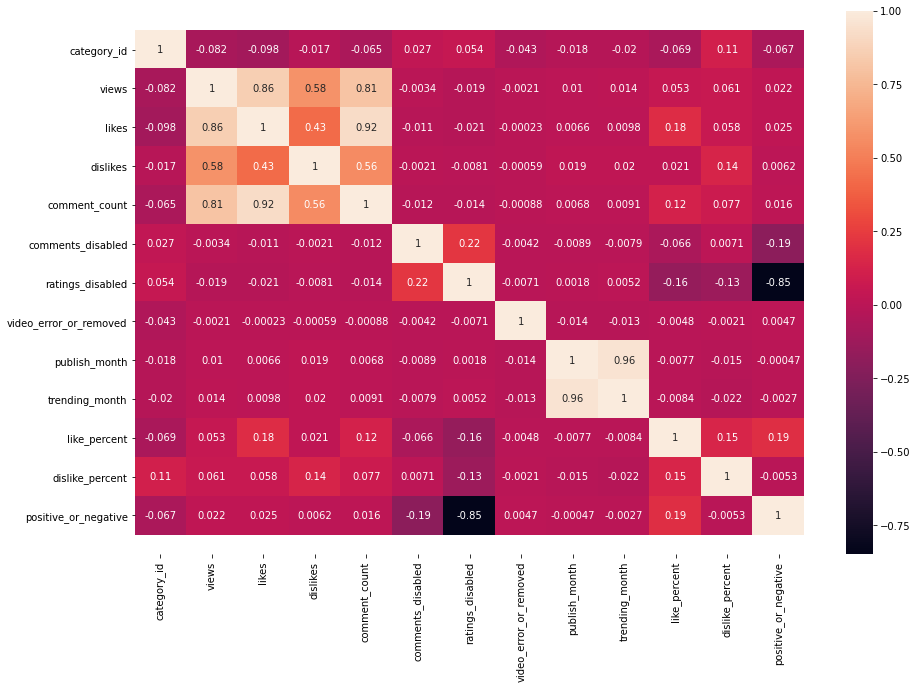

In [30]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(KR_video.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Insight : It looks like views, likes, comment_count, ratings_disabled and positive_or_negative are all relativley correlated

## Linear Regression

Predicting amount of likes for a video

In [31]:
df_KR = KR_video[['category_id','trending_date','trending_month','publish_time','publish_month','category_id','views','likes','dislikes',
         'positive_or_negative','comment_count']]

In [32]:
df_KR['views_log'] = np.log(df_KR['views'])
df_KR['likes_log'] = np.log(df_KR['likes'])
df_KR['dislikes_log'] = np.log(df_KR['dislikes'])
df_KR['comment_count_log'] = np.log(df_KR['comment_count'])

<ipython-input-32-724381d49600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KR['views_log'] = np.log(df_KR['views'])
C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-32-724381d49600>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KR['likes_log'] = np.log(df_KR['likes'])
<ipython-input-32-724381d49600>:3: SettingWithCopyWarning: 
A val

In [33]:
df_KR.head()

,category_id,trending_date,trending_month,publish_time,publish_month,category_id,views,likes,dislikes,positive_or_negative,comment_count,views_log,likes_log,dislikes_log,comment_count_log
0,22,2017-11-14,11,2017-11-13 07:07:36,11,22,156130,1422,40,1,272,11.958444,7.259820,3.688879,5.605802
1,25,2017-11-14,11,2017-11-13 10:59:16,11,25,76533,211,28,1,113,11.245477,5.351858,3.332205,4.727388
2,22,2017-11-14,11,2017-11-11 07:16:08,11,22,421409,5112,166,1,459,12.951359,8.539346,5.111988,6.129050
3,25,2017-11-14,11,2017-11-12 11:19:52,11,25,222850,2093,173,1,1219,12.314254,7.646354,5.153292,7.105786
4,25,2017-11-14,11,2017-11-13 11:08:59,11,25,84466,1094,109,1,450,11.344104,6.997596,4.691348,6.109248


In [34]:
X = df_KR[['trending_month','publish_month','category_id','positive_or_negative',
        'views','dislikes','comment_count']]
y = df_KR['likes']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
model = LinearRegression()

In [37]:
fit_model = model.fit(X_train,y_train)

In [38]:
print(model.intercept_)

2706.8665881370907


In [39]:
model.coef_

array([ 5.69541806e+01, -1.59112599e+01, -1.90448929e+02, -1.90448929e+02,
        2.27274266e+03,  1.90990171e-02, -1.42319559e+00,  3.78317507e+00])

In [40]:
X_train.columns

Index(['trending_month', 'publish_month', 'category_id', 'category_id',
       'positive_or_negative', 'views', 'dislikes', 'comment_count'],
      dtype='object')

In [41]:
cdf = pd.DataFrame(model.coef_,index = X_train.columns,columns=['Coefficients'])

In [42]:
cdf

,Coefficients
trending_month,56.954181
publish_month,-15.911260
category_id,-190.448929
category_id,-190.448929
positive_or_negative,2272.742659
views,0.019099
dislikes,-1.423196
comment_count,3.783175


In [43]:
predictions = model.predict(X_test)

In [44]:
predictions

array([-2010.08527028, -4693.03323928,   255.84999719, ...,
       -1741.55088926, -3661.23624069, -3221.28158097])

C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


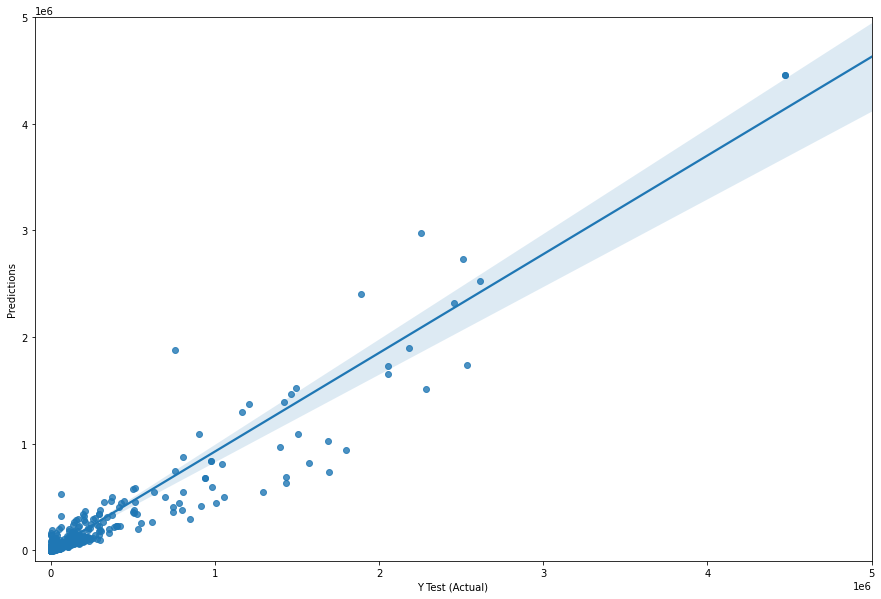

In [45]:
plt.figure(figsize=(15,10))
g = sns.regplot(y_test,predictions,fit_reg=True)
plt.xlabel('Y Test (Actual)')
plt.ylabel('Predictions')
g.set(xlim=(-100000,5000000),ylim=(-100000,5000000))
plt.show(g)

In [46]:
residuals = (y_test - predictions)
print(residuals)

18       2307.085270
3147     4693.033239
32141    2359.150003
16306     219.020831
27118   -4733.891203
            ...     
32793    4783.880054
14149     564.996763
14338    2883.550889
27151    3690.236241
2092     3738.281581
Name: likes, Length: 10371, dtype: float64


In [47]:
residuals.mean()

524.5140032140774

C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(-500000.0, 500000.0)]

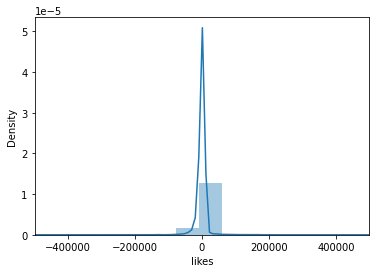

In [48]:
g = sns.distplot(residuals,bins=30)
g.set(xlim=(-500000,500000))

The most useful way to plot residuals is predicted (x - axis) and residuals (y - axis) Positive values for the residual (on the y - axis) means that the predicition was too low, and the negative values mean that the prediction was too high

<AxesSubplot:ylabel='likes'>

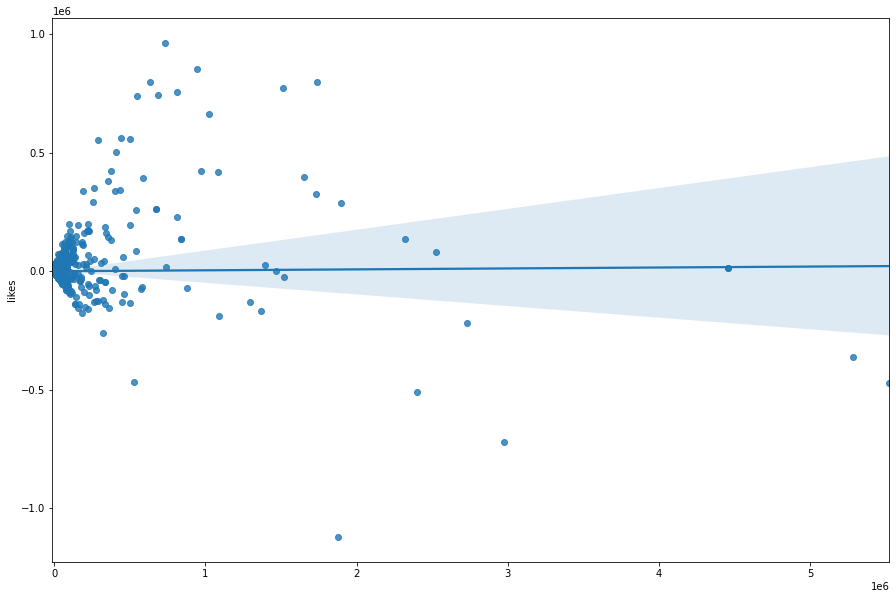

In [49]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions,y=residuals,fit_reg=True)

In [50]:
model.score(X_test,y_test)

0.9291284319215565

In [51]:
print('MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE :',metrics.mean_squared_error(y_test,predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 8330.903522043669
MSE : 1341475945.755799
RMSE : 36626.16476995372


This is our r-square this indicates the % of the variance in the dependent variable that the independent variables explain so in our case -> the % of 'views' that are dependent on the features 'X' (likes, views, comment count, etc) scale is 0-100% scale, we can also have a negative as well
A higher r-square means that smaller differences between the observed data and the fitted values, however having a higher r-square does not always mean that the model is a good fit.